In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
import openpyxl
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# 데이터 로딩 (전체 영화목록 및 대본 데이터)

In [2]:
import os

path = r'D:\02. College\02. 3학년 2학기\텍스트마이닝\기말프로젝트\기말프로젝트_211209\2021-12-11\\'
filename = 'TotalMovieList.csv'
df_total = pd.read_csv(path + filename, encoding='euc-kr')

# 전체 엑셀을 불러온다. 이걸 통해서 한줄씩 읽어준다.

In [3]:
rowLen = df_total.shape[0] ## 전체 행 길이 확인

In [4]:
movieIndex = [] ## 전체 영화들의 Index 목록을 담을 배열
for i in range(0, rowLen):
    print(i , " ", df_total['Index_4flix'][i])
    movieIndex.append(df_total['Index_4flix'][i]) ## 인덱스를 순서대로 담아줌. csv 읽을때 사용함

0   953
1   956
2   959
3   962
4   965
5   973
6   981
7   989
8   1001
9   1005
10   1892
11   1896
12   1900
13   1901
14   1904
15   1905
16   1908
17   1909
18   1916
19   1920
20   1925
21   1930
22   1932
23   1933
24   1936
25   1938
26   1939
27   1940
28   1941
29   1945
30   1950
31   1951
32   1953
33   1959
34   1964
35   1967
36   1968
37   1974
38   1975
39   1978
40   1983
41   1989
42   1994
43   1995
44   2000
45   2003
46   2005
47   2009
48   2011
49   2017
50   2020
51   2021
52   2022
53   2028
54   2031
55   2033
56   2035
57   2038
58   2041
59   2042
60   2043
61   2044
62   2045
63   2047
64   2049
65   2052
66   2057
67   2059
68   2061
69   2065
70   2069
71   2070
72   2074
73   2077
74   2080
75   2082
76   2083
77   2086
78   2088
79   2101
80   2102
81   2104
82   2106
83   2108
84   2111
85   2113
86   2115
87   2119
88   2121
89   2126
90   2128
91   2130
92   2133
93   2134
94   2137
95   2143
96   2146
97   2148
98   2162
99   2171
100   2175
101   2

In [5]:
## csv를 인덱스 순서대로 읽어서 Dataframe으로 만든다.
## Dataframe을 배열처럼 만드는 것은 인터넷 찾아서함. stack overflow. 한국어로 검색하면 numpy 배열로 바꾸는법 밖에없음

df_movies = {}
for i in range(0,rowLen):
    print(i, end = ' ')
    df_movies[i] = pd.DataFrame()
    try:
        df_movies[i] = pd.read_csv(path + str(movieIndex[i]) + ".csv", encoding='cp949')
    except:
        try:
            df_movies[i] = pd.read_csv(path + str(movieIndex[i]) + ".csv", encoding='utf-8')
        except:
            df_movies[i] = pd.read_csv(path + str(movieIndex[i]) + ".csv", encoding='utf-8-sig')
        

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [6]:
df_movies[0]

,Time,Subtitle,Translation
0,51s,Meslek hayatımın en zor vakası ile\nkar?ı kar?...,"초고난도 손님이다, 하이리"
1,55s,Bu adamı en son ebesi yıkamı?.,태어나서 처음 씻는 거래
2,58s,"[Hayri] Ka?ınıyor usta, kir artık\nayrı bedene...",때가 씻기기를 거부하고 있어요
3,1:02,Hi?bir kir benim hamamımdan\ndı?arı ?ıkamaz Ha...,때 한 톨도\n내 목욕탕을 떠나선 안 돼
4,1:05,Sen bana bir gazoz s?yle.,소다 한 잔 주문해
...,...,...,...
1436,1:34:02,Hangisini? ?eftaliyi mi?,어떤 말?\n복숭아?
1437,1:34:05,Ama yani. Bak ya. [Bahar g?ler]\n[Kahraman] Ni...,나한테 왜 이래요?\n그만해요
1438,1:34:09,"Tamam tamam ger?ekten,\nbir daha ?eftali falan...",다신 복숭아라고 안 할게요
1439,1:34:11,Anan desin anan. Anan desin.,엄마나 가져다줘요!


In [7]:
X = {}
# X는 줄거리, y는 평점
for i in range(0,rowLen):
    X[i] = df_movies[i]['Subtitle'].tolist()

In [8]:
Y = {}
# X는 줄거리, y는 평점
for i in range(0,rowLen):
    Y[i] = df_total['Score'][i].astype('int')

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Choco &
[nltk_data]     Moca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 데이터 전처리 (특수문자 제거 등)

In [10]:
def cleaningData(_list, _length):
    data_final = [[]]
    i = 0
    for i in range(0,_length):
        for sentence in _list[i]:
            sentence = sentence.replace('ı','')
            sentence = sentence.replace('\n','')
            sentence = sentence.replace('\r\n','')
            sentence_clean = ""
            for w in sentence:
                if w not in string.punctuation:
                    sentence_clean += w
                else:
                    continue
            data_final[i].append(sentence_clean)
        data_final.append([])
    return data_final

In [11]:
data_final = cleaningData(X, rowLen)

# 영화별 대사 구글 번역 및 저장

In [12]:
import googletrans

translator = googletrans.Translator()

In [13]:
import time

In [14]:
trans = [[]]
failed = [[]]
i = 0
maxLen = len(X)
num = 1
strLen = 0 ## 3900자 초과 안하도록, 3500자마다 리셋할것
sentence_temp = str() #3500자까지 모아두는 setnece
sentence_test = str() #테스트용 모두저장 setnece

for i in range(0,rowLen):
    num = 1
    for sentence in data_final[i]:
        strLen += len(sentence)
        if(strLen < 3500) & (num != len(data_final[i])):
            # data_final[i] 3500줄 이하나 문자 끝이 도달하면
            ## 성능을 높히기 위해서 3500자까지 모아뒀다가 translate를 함. 매줄마다 하면 너무 오래걸림.
            # 3900자가 최대이므로 3500자에서 끊음
            sentence = sentence + '/'
            sentence_temp += sentence #문자열을 모아둔다.
            num+=1
        else: # 3500줄을 초과하게 되면 실행 혹은 문자열이 전체가 끝이나면 실행
            try:
                sentence_temp_trans = translator.translate(sentence_temp, dest='en') ## 3500줄을 번역한다.
                trans[i] += sentence_temp_trans.text.split('/') ## \n 문자를 기준으로 문자열을 쪼개서 리스트화한다.
                print(num, end = ' ') # progress 측정용
                num+=1
            except:
                try: # 실패하면 한번 더 시도
                    time.sleep(0.1)
                    sentence_temp_trans = translator.translate(sentence_temp, dest='en') ## 3500줄을 번역한다.
                    trans[i] += sentence_temp_trans.text.split('/') ## \n 문자를 기준으로 문자열을 쪼개서 리스트화한다.
                    print(num, end = ' ') # progress 측정용
                    num+=1
                except:
                    failed[i] += sentence_temp ## \n 문자를 기준으로 문자열을 쪼개서 리스트화한다.
                    print('E', end = ' ') # 에러나면 E를 출력하고 failed에 저장해두고 나중에 다시처리
                    num+=1
            #sentence_test += sentence_temp_trans.text
            sentence_temp = str()
            strLen = 0
    
    # for문이 끝나면 실행되는것들
    trans.append([])
    failed.append([])
    print('trans[',i,'] 생성완료!')

96 197 293 388 484 584 676 783 886 987 1082 1196 1299 1400 1441 trans[ 0 ] 생성완료!
91 195 299 403 502 601 700 821 836 trans[ 1 ] 생성완료!
83 108 trans[ 2 ] 생성완료!
226 466 680 905 1122 1324 1612 trans[ 3 ] 생성완료!
115 238 349 465 572 690 822 946 1073 1198 1315 1432 1554 1680 1697 trans[ 4 ] 생성완료!
123 249 364 472 578 682 794 879 trans[ 5 ] 생성완료!
103 198 307 414 513 616 710 805 896 996 1090 1180 1288 1370 trans[ 6 ] 생성완료!
90 180 272 370 475 586 698 807 900 1001 1097 1113 trans[ 7 ] 생성완료!
206 453 705 949 1198 1419 1652 1889 1990 trans[ 8 ] 생성완료!
219 418 620 831 1017 trans[ 9 ] 생성완료!
138 283 418 552 670 803 934 1063 1182 1304 1459 trans[ 10 ] 생성완료!
305 622 983 1024 trans[ 11 ] 생성완료!
127 234 346 456 561 675 780 883 980 1089 1208 1307 1404 1512 1555 trans[ 12 ] 생성완료!
93 184 269 356 436 519 607 698 789 887 988 1096 1182 trans[ 13 ] 생성완료!
75 152 224 302 382 455 535 614 690 767 842 920 996 1071 1144 1221 1296 1388 1469 1543 1621 1625 trans[ 14 ] 생성완료!
265 480 trans[ 15 ] 생성완료!
78 161 241 339 360 trans[ 

In [15]:
# data는 trans를 googletrans 형식에서 보통으로 바꿔줌
data = list()
i = 0
maxLen = len(X)
num = 1

for i in range(0,maxLen):
    data.append(list())
    num = 1
    for sentence in trans[i]:
        #print(num, end = ' ')
        num+=1
        #data[i].append(sentence.text)
        if(str(type(sentence)) == "<class 'googletrans.models.Translated'>"):
            data[i].append(sentence.text)
        elif(str(type(sentence)) == "<class 'str'>"):
            data[i].append(sentence)
    print('data[',i,'] 생성완료!')

data[ 0 ] 생성완료!
data[ 1 ] 생성완료!
data[ 2 ] 생성완료!
data[ 3 ] 생성완료!
data[ 4 ] 생성완료!
data[ 5 ] 생성완료!
data[ 6 ] 생성완료!
data[ 7 ] 생성완료!
data[ 8 ] 생성완료!
data[ 9 ] 생성완료!
data[ 10 ] 생성완료!
data[ 11 ] 생성완료!
data[ 12 ] 생성완료!
data[ 13 ] 생성완료!
data[ 14 ] 생성완료!
data[ 15 ] 생성완료!
data[ 16 ] 생성완료!
data[ 17 ] 생성완료!
data[ 18 ] 생성완료!
data[ 19 ] 생성완료!
data[ 20 ] 생성완료!
data[ 21 ] 생성완료!
data[ 22 ] 생성완료!
data[ 23 ] 생성완료!
data[ 24 ] 생성완료!
data[ 25 ] 생성완료!
data[ 26 ] 생성완료!
data[ 27 ] 생성완료!
data[ 28 ] 생성완료!
data[ 29 ] 생성완료!
data[ 30 ] 생성완료!
data[ 31 ] 생성완료!
data[ 32 ] 생성완료!
data[ 33 ] 생성완료!
data[ 34 ] 생성완료!
data[ 35 ] 생성완료!
data[ 36 ] 생성완료!
data[ 37 ] 생성완료!
data[ 38 ] 생성완료!
data[ 39 ] 생성완료!
data[ 40 ] 생성완료!
data[ 41 ] 생성완료!
data[ 42 ] 생성완료!
data[ 43 ] 생성완료!
data[ 44 ] 생성완료!
data[ 45 ] 생성완료!
data[ 46 ] 생성완료!
data[ 47 ] 생성완료!
data[ 48 ] 생성완료!
data[ 49 ] 생성완료!
data[ 50 ] 생성완료!
data[ 51 ] 생성완료!
data[ 52 ] 생성완료!
data[ 53 ] 생성완료!
data[ 54 ] 생성완료!
data[ 55 ] 생성완료!
data[ 56 ] 생성완료!
data[ 57 ] 생성완료!
data[ 58 ] 생성완료!
data[ 5

# 문장 (줄거리) 요약 및 빈도 점수화

In [16]:
# summary 생성을 위해서 사용할 데이터를 생성한다. 대본 data에 특수문자 제거한 summary_X 데이터이다.
summary_X={}

for i in range(0,rowLen):
    #summary_X[i] = pd.DataFrame()
    summary_X[i]=data[i]

In [17]:
summary_X = cleaningData(summary_X, rowLen)

In [18]:
# text를 sentences로 변환 
# 특이한점은 data[i]를 사용한다는 점인데 이렇게 하는 이유는 문장을 쪼개려면 특수문자가 있어야하기 때문
sentence_list={}
for i in range(0,rowLen):
    ## 문장이 안쪼개지는 문제
    sentence_list[i] = nltk.sent_tokenize(str(data[i]))

In [19]:
sentence_list = cleaningData(sentence_list, rowLen)

In [20]:
# 목적 : 대본당 단어 빈도수를 체크
# 여기서는 summary_X를 사용해서 특수문자가 안끼어들게함.
from nltk.probability import FreqDist
fdist_array = {}
max_freq = []

for i in range(0,rowLen):
    #fdist_array[i] = FreqDist()
    fdist_array[i] = FreqDist(nltk.word_tokenize(str(summary_X[i])))
    max_freq.append(fdist_array[i][fdist_array[i].max()])

# 토큰화 하면서 생기는 특수문자 삭제    
for i in range(0,rowLen):
    for w in string.punctuation:
        del(fdist_array[i][w])

In [21]:
fdist_array[0]

FreqDist({'the': 301, 'you': 201, 'to': 199, 'I': 132, 'is': 115, 'a': 98, 'You': 79, 'of': 75, 'in': 73, 'OK': 68, ...})

In [22]:
#각 대본별로 모든 단어들의 가중치

word_freq = []

for i in range(0, rowLen):
    word_freq.append({})
    for k,v in fdist_array[i].items():
        word_frequencies = v / max_freq[i]
        #print(k , " ", word_frequencies/max_freq[i])
        word_freq[i][k] = word_frequencies

In [23]:
word_freq[0]

{"'Occupational": 0.0004079967360261118,
 'life': 0.0004079967360261118,
 'is': 0.04691962464300286,
 'the': 0.12280701754385964,
 'most': 0.002039983680130559,
 'difficult': 0.0004079967360261118,
 'Vakas': 0.0004079967360261118,
 'Rowar': 0.0004079967360261118,
 'Karyaym': 0.0004079967360261118,
 'Hayri': 0.009791921664626682,
 'This': 0.017543859649122806,
 'guy': 0.004895960832313341,
 'wants': 0.0012239902080783353,
 'to': 0.08119135046919625,
 'make': 0.00448796409628723,
 'recent': 0.0004079967360261118,
 'midnight': 0.0004079967360261118,
 'or': 0.023663810689514484,
 'Hayry': 0.0004079967360261118,
 'Beek': 0.0004079967360261118,
 'Master': 0.009791921664626682,
 'dirt': 0.0012239902080783353,
 'Artkayr': 0.0004079967360261118,
 'Body': 0.0004079967360261118,
 'Hydrated': 0.0004079967360261118,
 'My': 0.009791921664626682,
 'Hamammandar': 0.0004079967360261118,
 'Kamaz': 0.0004079967360261118,
 'You': 0.03223174214606283,
 'are': 0.024887800897592818,
 'a': 0.03998368013055895

In [24]:
# 문장 점수 계산

sentence_scores = []
for i in range(0, rowLen):
    sentence_scores.append({})
    for sent in sentence_list[i]:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_freq[i].keys():
                if sent not in sentence_scores[i].keys():
                    sentence_scores[i][sent] = word_freq[i][word]
                else:
                    sentence_scores[i][sent] += word_freq[i][word]

In [25]:
sentence_scores[0]

{'Occupational life is the most difficult Vakas Rowar Karyaym Hayri   This guy wants to make the most recent midnight or Hayry Beek Master dirt Artkayr Body   Hydrated dirt My Hamammandar Kamaz Hayri   You are a soda SYLE   this man Obviously Masters   lying on Hayri to make me ok Adam OK ABRAZ Diil Mi ABIAC No dirt   You Ear Nozzle Kvamnagele You are coming to YourAm   YA Allah   AYC SHAZE MAKE NUMI   AYC where brakaym abi   kamil brak   AYC Kamil Abikamil HH   Brands Where are you to be faded or grme i VARAYC FSLDYOR   What is the brand curiosity of these genes   SAA or LA SAA Little more SAA   AYC Tanju Abi showcase Why you want to Grkin   Cnnetis   CLYNI I would like to grkin or what graph didnt come here   Cemil Lan Kahtis Eniiustan': 1.8743370053039576,
 'AYC None Cemil Abihamda Youve just entered   or Bacanak Why are you stubbing   guy Buray Ykak Mis like Mishave   Mall will be Hamamn like what you want   or what do you want to be Hamamn what do you want to Mahmut Mahmut Mahmut 

In [26]:
## 정규화 (특수문자 빼기)
## 정규화 (\n 뺴기)
import heapq  

In [27]:
# 문서 요약
summary_sentences = []
summary_final = []

for i in range(0, rowLen):
    summary_sentences.append([])
    summary_final.append([])
    summary_sentences[i] = heapq.nlargest(10, sentence_scores[i], key=sentence_scores[i].get)
    summary_final[i] = ' '.join(summary_sentences[i])  

In [28]:
summary_sentences[0]

[' The Balnes are coming   You are coming to the Ear Nozzle Kvamnagetes   Balnes come   Hayri Olmise You are coming   NonHayri M   BTH KZs Setting the Nonnut M   BTH BOALD DONT COME DO NEWS   Master Agency Needs to Come   I Dont Know   Tvbe Yarabbi Ya   Kahramo Bey Do You Do You   We are a massage but you are not very balm saying   No Baliki Yayz is a bale   but HZL Hzl is going on the bally   Baliki Balikesirli Balikesi Baliki   Balikesirli Balikesirli Bali   Im Normal   But this Neymi Ya Kazki is also so Mkazk Hayr Balikesirli Nehi   Barma Anan Yaldaym I   ZR I wish you MSNZ DRN   YA Bacanak   Balnlari Gzleri Normal in the MSNZ   Balnleri Gzleri Normal Executive DeiL Mi   Hehe   Those also EXCIDENTIAL AAAYY DORW DELEY EXCHANGE Ellam   Ulan Berber Did the Hero Calling with me   what happened to the Hero and what was a massage Geer   Bacanak Positioned Ocuun Can SKKN   Sklece What will be what will happen to yourself Animal   Tokat La Burd Tokatyabancnn ii What is Here   EdiHangar Main

In [29]:
summary_final[0]

' The Balnes are coming   You are coming to the Ear Nozzle Kvamnagetes   Balnes come   Hayri Olmise You are coming   NonHayri M   BTH KZs Setting the Nonnut M   BTH BOALD DONT COME DO NEWS   Master Agency Needs to Come   I Dont Know   Tvbe Yarabbi Ya   Kahramo Bey Do You Do You   We are a massage but you are not very balm saying   No Baliki Yayz is a bale   but HZL Hzl is going on the bally   Baliki Balikesirli Balikesi Baliki   Balikesirli Balikesirli Bali   Im Normal   But this Neymi Ya Kazki is also so Mkazk Hayr Balikesirli Nehi   Barma Anan Yaldaym I   ZR I wish you MSNZ DRN   YA Bacanak   Balnlari Gzleri Normal in the MSNZ   Balnleri Gzleri Normal Executive DeiL Mi   Hehe   Those also EXCIDENTIAL AAAYY DORW DELEY EXCHANGE Ellam   Ulan Berber Did the Hero Calling with me   what happened to the Hero and what was a massage Geer   Bacanak Positioned Ocuun Can SKKN   Sklece What will be what will happen to yourself Animal   Tokat La Burd Tokatyabancnn ii What is Here   EdiHangar Main 

# 대본 및 줄거리를 활용한 점수예측

In [30]:
# 줄거리 전처리 함수

def plot_tokenize(plot):      

    #values = ','.join(str(v) for v in value_list)
    word = ''.join(str(plot)) # 리스트를 문자열로 변환
    word_lower=[word.lower() for word in word.split()] # 소문자화
    stopwords=nltk.corpus.stopwords.words('english') # nltk에서 제공한 불용어 처리
    
    word_final=[w for w in word_lower if w not in stopwords]
    
    return word_final

In [31]:
bow_transformer_script = CountVectorizer()
bow_transformer_script_summary = CountVectorizer()

In [32]:
# sklearn의 CountVectorizer 함수 사용, bow(bag of words)로 변환하는 객체 생성
bow_transformer_script = CountVectorizer(analyzer=plot_tokenize).fit(data)
bow_transformer_script_summary = CountVectorizer(analyzer=plot_tokenize).fit(summary_final)

In [33]:
vector_script = bow_transformer_script.transform(data)
vector_script_summary = bow_transformer_script_summary.transform(summary_final)

In [34]:
print(vector_script)

  (0, 1)	149
  (0, 12)	152
  (0, 82)	1
  (0, 164)	1
  (0, 167)	1
  (0, 188)	1069
  (0, 194)	13
  (0, 195)	1
  (0, 198)	1078
  (0, 1210)	1
  (0, 1390)	1
  (0, 4441)	1
  (0, 6316)	1
  (0, 6410)	1
  (0, 6411)	1
  (0, 8705)	1
  (0, 10030)	1
  (0, 10756)	1
  (0, 14770)	1
  (0, 14886)	1
  (0, 16099)	1
  (0, 17591)	3
  (0, 18087)	2
  (0, 19009)	1
  (0, 19177)	1
  :	:
  (352, 170763)	22
  (352, 170765)	22
  (352, 170959)	1
  (352, 171011)	4
  (352, 171012)	1
  (352, 171167)	2
  (352, 171175)	1
  (352, 171289)	1
  (352, 171307)	5
  (352, 171308)	1
  (352, 171366)	1
  (352, 171367)	2
  (352, 171413)	2
  (352, 171484)	1
  (352, 171699)	17
  (352, 171700)	3
  (352, 171902)	43
  (352, 172264)	2
  (352, 172327)	1
  (352, 172355)	1
  (352, 172495)	15
  (352, 172556)	1
  (352, 172609)	1
  (352, 172618)	2
  (352, 173091)	2


In [35]:
print(vector_script_summary)

  (0, 355)	2
  (0, 1027)	1
  (0, 1144)	1
  (0, 1150)	1
  (0, 1537)	1
  (0, 1545)	1
  (0, 1546)	1
  (0, 1563)	1
  (0, 1609)	1
  (0, 1634)	20
  (0, 1637)	1
  (0, 1638)	1
  (0, 1652)	1
  (0, 1654)	1
  (0, 1655)	1
  (0, 1658)	1
  (0, 1664)	1
  (0, 1668)	3
  (0, 1904)	2
  (0, 2016)	11
  (0, 2093)	1
  (0, 2099)	1
  (0, 2124)	1
  (0, 2242)	1
  (0, 2263)	1
  :	:
  (352, 124820)	1
  (352, 124869)	1
  (352, 124888)	1
  (352, 124989)	1
  (352, 125007)	1
  (352, 125083)	2
  (352, 125503)	69
  (352, 125749)	1
  (352, 125791)	5
  (352, 125933)	2
  (352, 125940)	2
  (352, 126006)	2
  (352, 126033)	11
  (352, 126111)	3
  (352, 126164)	2
  (352, 126216)	1
  (352, 126383)	34
  (352, 126466)	2
  (352, 126850)	3
  (352, 126916)	2
  (352, 126922)	1
  (352, 127047)	17
  (352, 127113)	1
  (352, 127598)	2
  (352, 127652)	1


In [36]:
y1 = []

for k,v in Y.items():
    y1.append(v)

In [37]:
print(y1, end ='')
print('\n',len(y1))

[5, 6, 7, 7, 5, 4, 6, 5, 6, 8, 6, 7, 7, 8, 7, 5, 7, 5, 6, 6, 5, 7, 7, 7, 5, 7, 4, 5, 5, 6, 6, 7, 7, 6, 7, 7, 5, 6, 7, 7, 5, 5, 6, 7, 7, 8, 5, 6, 5, 6, 7, 6, 7, 4, 6, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 8, 7, 6, 5, 7, 8, 7, 7, 6, 7, 6, 6, 7, 7, 6, 6, 6, 5, 4, 6, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 7, 6, 7, 6, 6, 6, 7, 6, 5, 6, 7, 7, 6, 6, 6, 6, 7, 6, 8, 8, 6, 3, 7, 7, 6, 7, 7, 8, 7, 6, 6, 4, 7, 7, 6, 6, 6, 8, 7, 4, 6, 5, 5, 6, 5, 6, 6, 6, 7, 7, 7, 6, 5, 7, 7, 4, 7, 6, 6, 6, 6, 6, 2, 6, 6, 6, 5, 6, 5, 6, 6, 7, 7, 5, 6, 7, 6, 5, 3, 7, 5, 5, 6, 6, 6, 6, 5, 6, 7, 7, 7, 5, 7, 7, 6, 5, 4, 7, 6, 7, 7, 6, 5, 6, 7, 7, 5, 6, 6, 5, 5, 5, 7, 5, 6, 6, 7, 6, 6, 6, 7, 6, 5, 7, 7, 5, 5, 7, 7, 6, 5, 6, 6, 7, 8, 7, 6, 6, 7, 5, 6, 4, 6, 7, 6, 7, 6, 4, 6, 5, 5, 4, 4, 7, 5, 5, 7, 5, 5, 5, 7, 7, 5, 5, 4, 6, 7, 7, 6, 6, 5, 5, 7, 6, 8, 7, 8, 5, 7, 6, 7, 7, 4, 6, 6, 5, 9, 7, 7, 6, 3, 6, 6, 5, 5, 8, 7, 6, 5, 6, 8, 6, 6, 7, 6, 6, 8, 7, 6, 7, 6, 7, 7, 7, 5, 6, 5, 8, 5, 6, 7, 5, 7, 7, 5, 5, 7, 6, 6, 6, 8, 8, 6, 

In [38]:
# training data, test data 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector_script, y1, test_size=0.4, random_state=101)

In [39]:
# training data, test data 분할
from sklearn.model_selection import train_test_split
X_train_summary, X_test_summary, y_train_summary, y_test_summary = train_test_split(vector_script_summary, y1, test_size=0.4, random_state=101)

In [40]:
from sklearn.naive_bayes import MultinomialNB
nb_script = MultinomialNB()
nb_script.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb_script_summary = MultinomialNB()
nb_script_summary.fit(X_train_summary, y_train_summary)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
# test, evaluation
preds_script = nb_script.predict(X_test)
preds_script_summary = nb_script_summary.predict(X_test_summary)

In [43]:
## 대본으로 예측한 결과
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds_script))
print('\n')
print(classification_report(y_test, preds_script))

[[ 0  0  0  0  1  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  2  3  0]
 [ 0  0  0  4 19  7  0]
 [ 0  0  0  0 45 11  0]
 [ 0  0  0  0 26 14  0]
 [ 0  0  0  0  8  1  0]]


              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       1.00      0.13      0.24        30
           6       0.44      0.80      0.57        56
           7       0.39      0.35      0.37        40
           8       0.00      0.00      0.00         9

    accuracy                           0.44       142
   macro avg       0.26      0.18      0.17       142
weighted avg       0.49      0.44      0.38       142



c:\users\choco & moca\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
## 대본으로 만든 줄거리 요약본으로 예측한 결과

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test_summary, preds_script_summary))
print('\n')
print(classification_report(y_test_summary, preds_script_summary))

[[ 0  0  0  0  1  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  3  2  0]
 [ 0  0  0  3 26  1  0]
 [ 0  0  0  0 49  7  0]
 [ 0  0  0  0 33  7  0]
 [ 0  0  0  0  8  1  0]]


              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       1.00      0.10      0.18        30
           6       0.40      0.88      0.55        56
           7       0.39      0.17      0.24        40
           8       0.00      0.00      0.00         9

    accuracy                           0.42       142
   macro avg       0.26      0.16      0.14       142
weighted avg       0.48      0.42      0.32       142



# 데이터 추가 분석

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [46]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred_DT = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [47]:
knn  = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

61.14

# 데이터 시각화

In [141]:
## 예측점수 일치여부 산점도 시각화

realLabel = []
realLabel_summary = []
predLabel = []
predLabel_summary = []

for i in range(0, len(y_test)):
    realLabel.append([])
    realLabel[i] = i, y_test[i]

for i in range(0, len(y_test_summary)):
    realLabel_summary.append([])
    realLabel_summary[i] = i, y_test_summary[i]

for i in range(0, len(preds_script)):
    predLabel.append([])
    predLabel[i] = i, preds_script[i]
    
for i in range(0, len(preds_script_summary)):
    predLabel_summary.append([])
    predLabel_summary[i] = i, preds_script_summary[i]

In [144]:
plotdata_realLabel = pd.DataFrame(realLabel)#, index = ['movieIndex', 'score'])
plotdata_realLabel.columns = ['movieIndex', 'score']

plotdata_realLabel_summary = pd.DataFrame(realLabel_summary)#, index = ['movieIndex', 'score'])
plotdata_realLabel_summary.columns = ['movieIndex', 'score']

plotdata_predLabel = pd.DataFrame(predLabel)
plotdata_predLabel.columns = ['movieIndex', 'score']

plotdata_predLabel_summary = pd.DataFrame(predLabel_summary)
plotdata_predLabel_summary.columns = ['movieIndex', 'score']

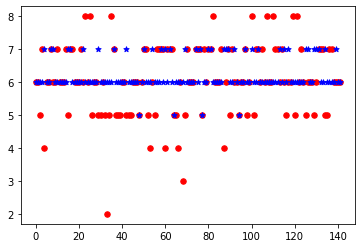

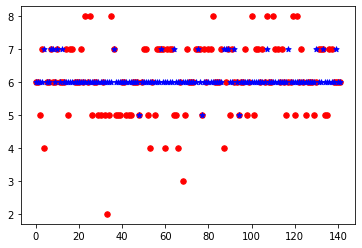

In [147]:

plt.scatter(plotdata_realLabel['movieIndex'], plotdata_realLabel['score'], marker='o', c='r', s=30)
plt.scatter(plotdata_predLabel['movieIndex'], plotdata_predLabel['score'], marker='*', c='b', s=30)

plt.show()

plt.scatter(plotdata_realLabel_summary['movieIndex'], plotdata_realLabel_summary['score'], marker='o', c='r', s=30)
plt.scatter(plotdata_predLabel_summary['movieIndex'], plotdata_predLabel_summary['score'], marker='*', c='b', s=30)

plt.show()

In [48]:
# 지프의 법칙 시각화

# 영화 첫번째랑 두번째로 검증
fdist_sorted_0 = sorted(fdist_array[0].items(), key = lambda x:x[1], reverse = True)

# 첫번째 영화 대본 단어와 빈도수를 x,y 좌표 리스트로 저장
#전체 단어에 대한 지프의 법칙 그래프
plot_x0 = []
plot_y0 = []

#가시성을 위해 상위 20개만 지프의 법칙 그래프
plot_x0_small = []
plot_y0_small = []

for w in fdist_sorted_0[:]:
    plot_x0.append(w[0])
    plot_y0.append(w[1])
    
for w in fdist_sorted_0[:20]:
    plot_x0_small.append(w[0])
    plot_y0_small.append(w[1])

In [49]:
# 영화 첫번째랑 두번째로 검증
fdist_sorted_1 = sorted(fdist_array[1].items(), key = lambda x:x[1], reverse = True)
fdist_sorted_1

# 두번째 영화 대본 단어와 빈도수를 x,y 좌표 리스트로 저장

#전체 단어에 대한 지프의 법칙 그래프
plot_x1 = []
plot_y1 = []

#가시성을 위해 상위 20개만 지프의 법칙 그래프
plot_x1_small = []
plot_y1_small = []

for w in fdist_sorted_1[:]:
    plot_x1.append(w[0])
    plot_y1.append(w[1])

for w in fdist_sorted_0[:20]:
    plot_x1_small.append(w[0])
    plot_y1_small.append(w[1])

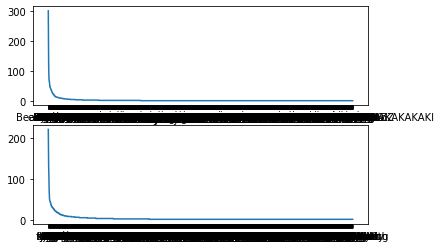

In [50]:
from matplotlib import pyplot as plt

#첫번째 대본 지프의 법칙 전체본
plt.subplot(211)
plt.plot(plot_x0, plot_y0)

#두번째 대본 지프의 법칙 전체본
plt.subplot(212)
plt.plot(plot_x1, plot_y1)


plt.show()

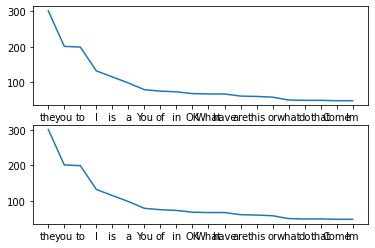

In [51]:
#첫번째 대본 지프의 법칙 요약본
plt.subplot(211)
plt.plot(plot_x0_small, plot_y0_small)

#두번째 대본 지프의 법칙 요약본
plt.subplot(212)
plt.plot(plot_x1_small, plot_y1_small)

plt.show()